In [1]:
from qiskit.circuit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_histogram

In [2]:
def bernstein_vazirani_circuit(n, f: list[bool]):
    nQubits = n
    qr = QuantumRegister(nQubits+1,name='q')
    cr = ClassicalRegister(nQubits,name='c')
    
    qc = QuantumCircuit(qr, cr)
    # H 
    for q in qr[:-1]:
        qc.h(q)
    qc.x(qr[-1])
    qc.h(qr[-1])
    qc.barrier(qr)

    # Oracle 
    for i in range(nQubits):
        if f[1<<i]:
            qc.cx(qr[i],qr[-1])

    qc.barrier(qr)
    # H
    qc.h(qr[-1])
    qc.x(qr[-1])
    for q in qr[:-1]:
        qc.h(q)

    qc.barrier(qr)
    # Final
    qc.measure(qr[:-1],cr)
    return qc




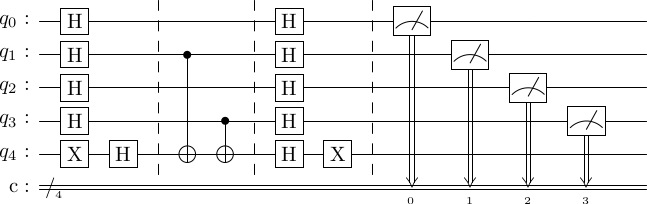

In [3]:
circuit = bernstein_vazirani_circuit(4,[0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0])
style = {'backgroundcolor': 'lavender'}
circuit.draw(output='mpl', style = style)

In [4]:
from qiskit_aer import StatevectorSimulator

# use local simulator
backend = StatevectorSimulator()
shots = 1
job = backend.run(circuits=circuit, shots=shots,memory=True)
result = job.result()
result.get_memory()[0]

'1010'

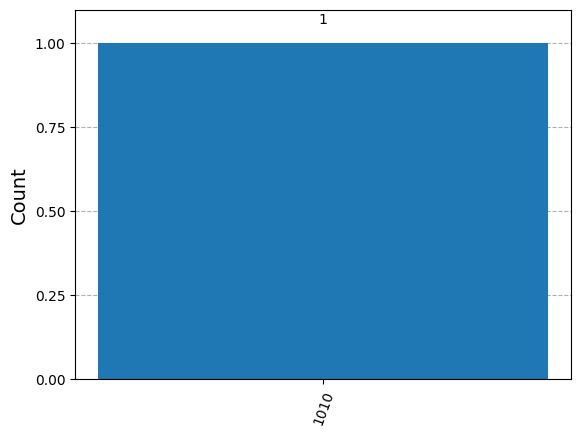

In [5]:
plot_histogram(result.get_counts(circuit))